<a href="https://colab.research.google.com/github/mifidyFanantenana/property24_ml/blob/main/Projet_final_Carraz_par_Fanantenana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column', 23)

In [60]:
data = pd.read_csv("property24_data.csv")

In [5]:
data.head()

,Bathrooms,Bedrooms,Erf Size,Floor Size,Garages,Listing Date,Listing Number,Pet Friendly,Price,Town,Type of Property,Garden,Pool,Secure Parking,Parking,No Pets Allowed,Furnished,Flatlet,Fibre Internet,Furnished (Optional),ADSL Internet,Satellite Internet,Fixed WiMax Internet
0,3.0,3.0,304 m²,326 m²,2.0,10 July 2020,108859219,1.0,6480000.0,"Tokai, Cape Town",House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,NaN,140 m²,2.0,23 September 2020,109153971,1.0,6250000.0,"14 Graham Road, Sea Point, Cape Town",Townhouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,4.0,659 m²,300 m²,2.0,23 September 2020,109154367,NaN,13950000.0,"Camps Bay, Cape Town",House,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,NaN,NaN,NaN,23 September 2020,109154455,NaN,1050000.0,"Ottery, Cape Town",Apartment / Flat,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,61 m²,NaN,23 July 2020,108907258,NaN,1265000.0,"Muizenberg, Cape Town",Apartment / Flat,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##nombre de ligne et nombre de colonne
data.shape

(7901, 23)

# Analyse de forme
- **Target variable**      : Price
- **Taille**               : 7901 lignes et 23 colonnes
- **Types de variables**   : qualitatives : 5, quantitatives: 18
- **Valeur manquantes**    : Il y a beaucoup de valeur manquante

# Analyse de fond
## Signification des variables 
- **Variable binaire**    : Garden, Pool, Pet Friendly, No pets allowed, Fibre Internet, Flatlet, Furnished,ADSL Internet, Furnished (Optional), Satellite Internet, Fixed WiMax Internet
- **Variable Town**       : beaucoup de Town
### Relation target / variable
- **Price / Town**       : le prix ne depend pas du Town

## Analyse de la forme des donnees

In [ ]:
data.shape #7901 ligne et 23 colonne

(7901, 23)

In [ ]:
data.dtypes

Bathrooms               float64
Bedrooms                float64
Erf Size                 object
Floor Size               object
Garages                 float64
Listing Date             object
Listing Number            int64
Pet Friendly            float64
Price                   float64
Town                     object
Type of Property         object
Garden                  float64
Pool                    float64
Secure Parking          float64
Parking                 float64
No Pets Allowed         float64
Furnished               float64
Flatlet                 float64
Fibre Internet          float64
Furnished (Optional)    float64
ADSL Internet           float64
Satellite Internet      float64
Fixed WiMax Internet    float64
dtype: object

In [ ]:
data.dtypes.value_counts()

float64    17
object      5
int64       1
dtype: int64

<AxesSubplot:ylabel='None'>

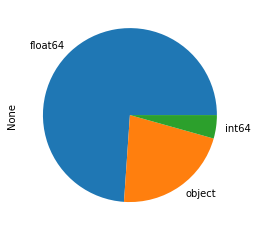

In [ ]:
data.dtypes.value_counts().plot.pie() #Il n'y a que 5 colonne de variable qualitatif, le reste est quantitatif

<AxesSubplot:>

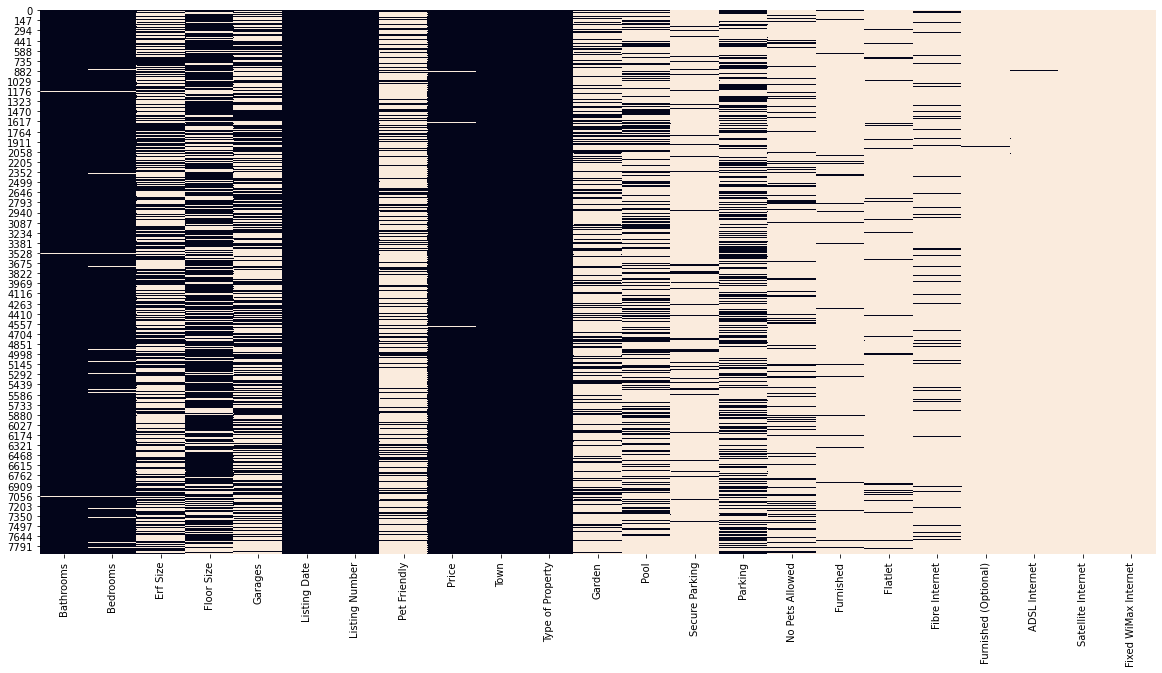

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False) #Il y a beaucoup de NaN

In [ ]:
(data.isna().sum() / data.shape[0]).sort_values(ascending=True)

Listing Date            0.000000
Listing Number          0.000000
Town                    0.000000
Type of Property        0.000000
Price                   0.006961
Bathrooms               0.011264
Bedrooms                0.030376
Floor Size              0.257183
Garages                 0.527655
Erf Size                0.539932
Parking                 0.566764
Pool                    0.653462
Garden                  0.743070
Pet Friendly            0.743577
No Pets Allowed         0.833059
Fibre Internet          0.899380
Secure Parking          0.915707
Flatlet                 0.947602
Furnished               0.962157
ADSL Internet           0.994937
Furnished (Optional)    0.997216
Satellite Internet      0.998481
Fixed WiMax Internet    0.999873
dtype: float64

### Retirer colonne surement inutile

In [61]:
data = data.drop('Listing Date', axis=1)
data = data.drop('Listing Number', axis=1)

## remplir les cases vide logique

In [ ]:
data['Price'].value_counts()

2995000.0     103
1950000.0      88
2950000.0      85
1850000.0      85
1350000.0      83
             ... 
2793000.0       1
538500.0        1
3275000.0       1
24999000.0      1
5050000.0       1
Name: Price, Length: 1167, dtype: int64

In [62]:
def unityOfMeasure(df):
  allTypes = set()
  for size in df:
    str_size = str(size)
    splited = str_size.rsplit(' ', 1)
    if(len(splited) > 1):
      allTypes.add(splited[1])
  return allTypes

In [63]:
unityOfMeasure(data['Floor Size'])

{'m²'}

In [64]:
unityOfMeasure(data['Erf Size'])

{'ha', 'm²'}

In [73]:
def removeM2(col):
    newCol = []
    i = 0
    for size in col:
        str_value = str(size)
        val_unity = str_value.rsplit(' ', 1)
        val = float(val_unity[0].replace(' ',''))
        if len(val_unity) == 2:
          if val_unity[1] == 'ha':
            col[i] = val * 10000
          else:
            col[i] = val            
        else:
          col[i] = val
        i = i + 1

In [74]:
removeM2(data['Floor Size'])
removeM2(data['Erf Size'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
data['Floor Size'] = pd.to_numeric(data['Floor Size'], downcast='float')

In [76]:
data['Erf Size'] = pd.to_numeric(data['Erf Size'], downcast='float')

In [77]:
data['Garden'] = data['Garden'].fillna(value=0)

In [78]:
data['Pool'] = data['Pool'].fillna(value=0)

In [79]:
data['Pet Friendly'] = data['Pet Friendly'].fillna(value=0)

In [80]:
data['No Pets Allowed'] = data['No Pets Allowed'].fillna(value=0)

In [81]:
data['Fibre Internet'] = data['Fibre Internet'].fillna(value=0)

In [82]:
data['Flatlet'] = data['Flatlet'].fillna(value=0)

In [83]:
data['Furnished'] = data['Furnished'].fillna(value=0)

In [84]:
data['ADSL Internet'] = data['ADSL Internet'].fillna(value=0)

In [85]:
data['Furnished (Optional)'] = data['Furnished (Optional)'].fillna(value=0)

In [86]:
data['Satellite Internet'] = data['Satellite Internet'].fillna(value=0)

In [87]:
data['Fixed WiMax Internet'] = data['Fixed WiMax Internet'].fillna(value=0)

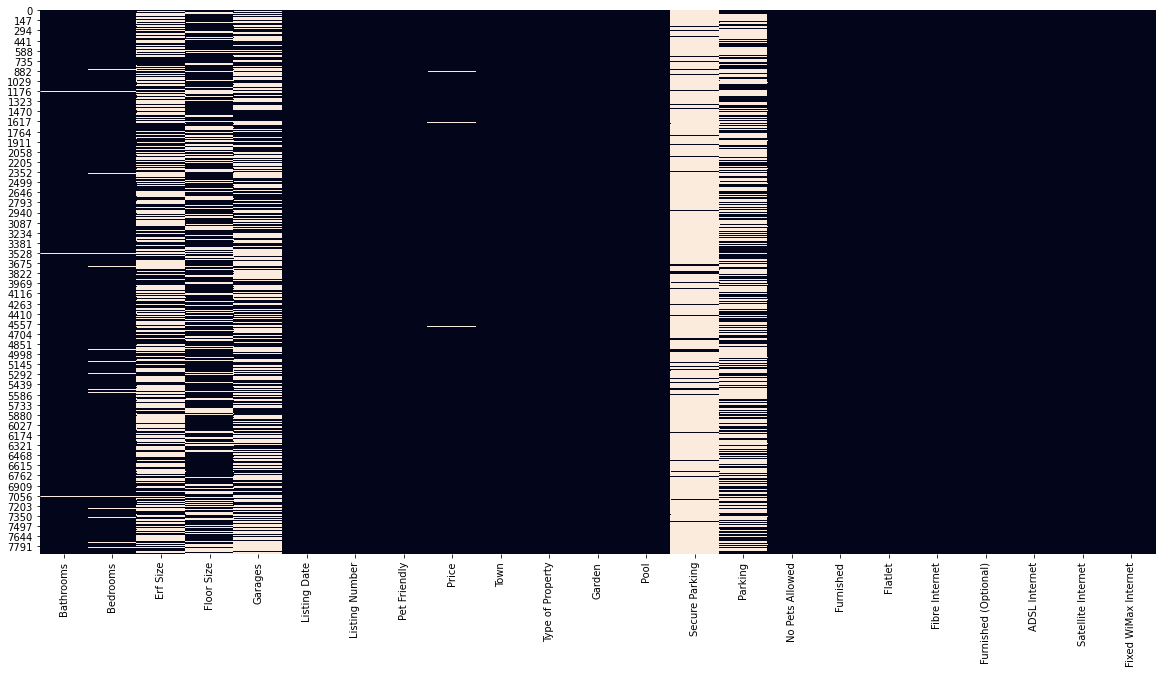

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

   ## Histogrames des variables continues

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this wa

<Figure size 432x288 with 0 Axes>

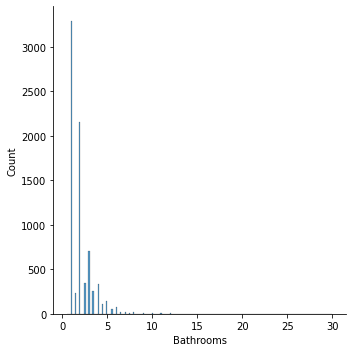

<Figure size 432x288 with 0 Axes>

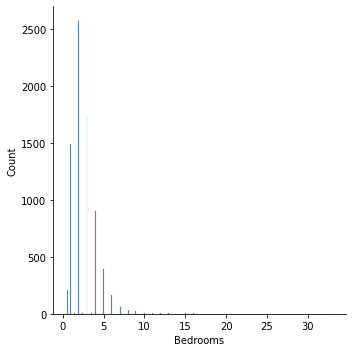

<Figure size 432x288 with 0 Axes>

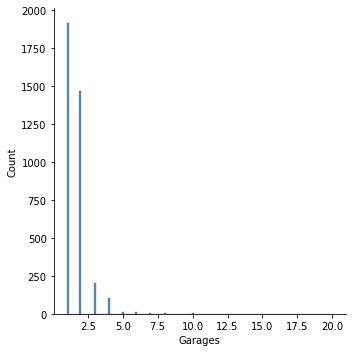

<Figure size 432x288 with 0 Axes>

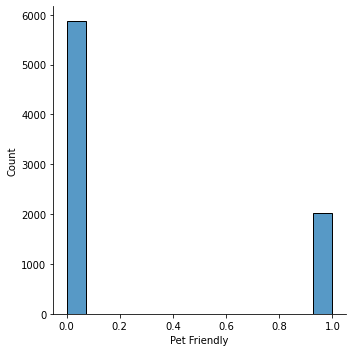

<Figure size 432x288 with 0 Axes>

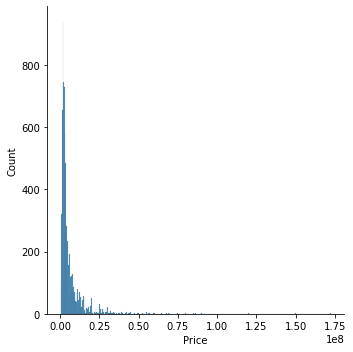

<Figure size 432x288 with 0 Axes>

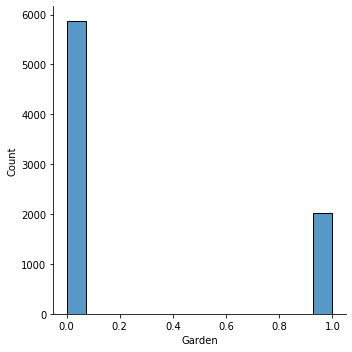

<Figure size 432x288 with 0 Axes>

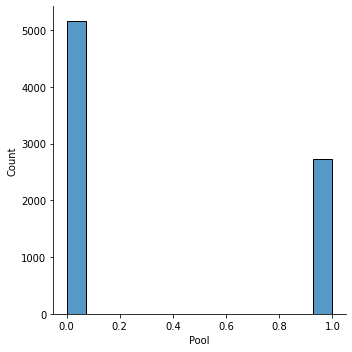

<Figure size 432x288 with 0 Axes>

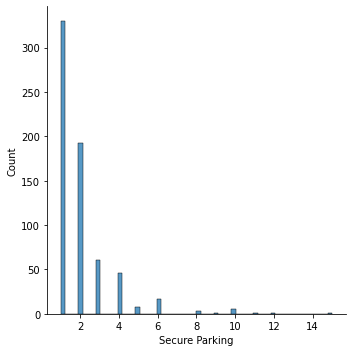

<Figure size 432x288 with 0 Axes>

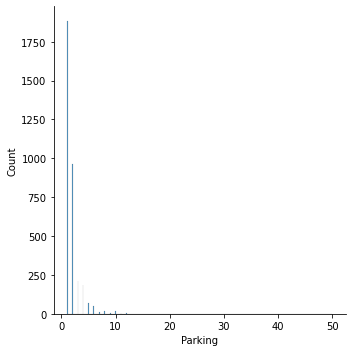

<Figure size 432x288 with 0 Axes>

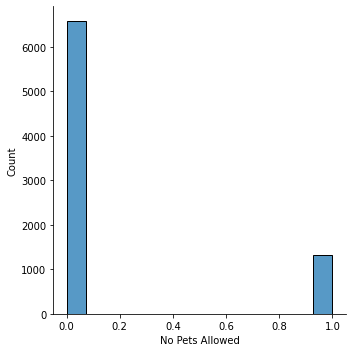

<Figure size 432x288 with 0 Axes>

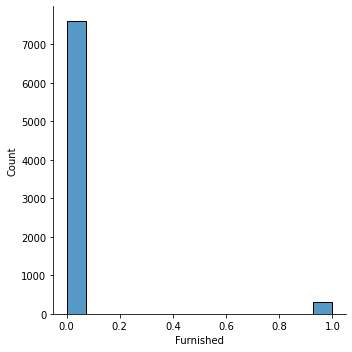

<Figure size 432x288 with 0 Axes>

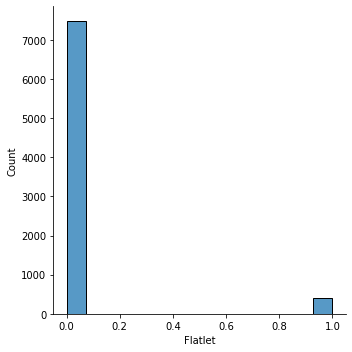

<Figure size 432x288 with 0 Axes>

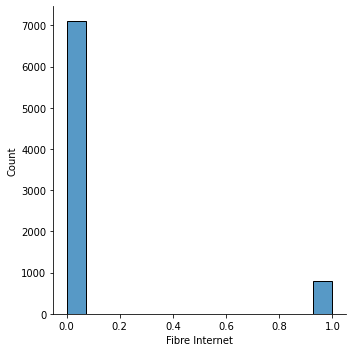

<Figure size 432x288 with 0 Axes>

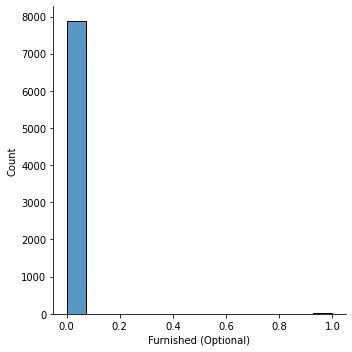

<Figure size 432x288 with 0 Axes>

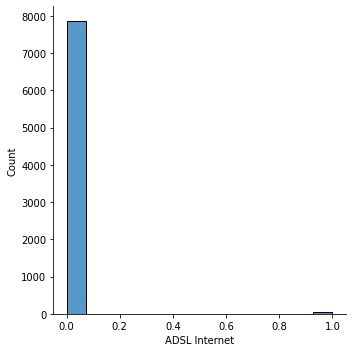

<Figure size 432x288 with 0 Axes>

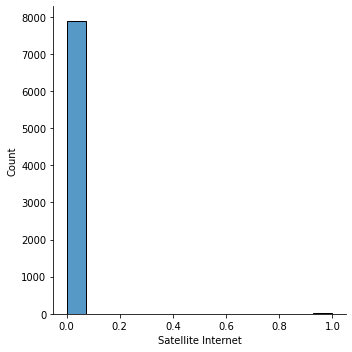

<Figure size 432x288 with 0 Axes>

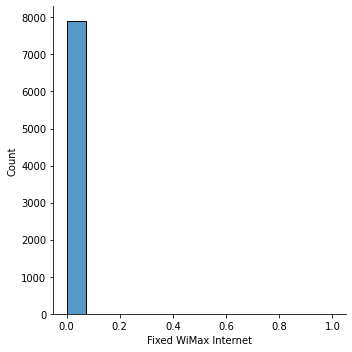

In [52]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.displot(data[col])

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

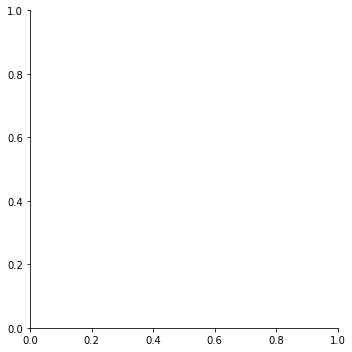

In [91]:
for col in data.select_dtypes('float32'):
    plt.figure()
    sns.displot(data[col])

## variable discretes

In [56]:
for col in data.select_dtypes('object'):
    print(f'{col :-<20} {data[col].unique()}')

Town---------------- ['Tokai, Cape Town' '14 Graham Road, Sea Point, Cape Town'
 'Camps Bay, Cape Town' ... '203 Lochinvar, Tamboerskloof, Cape Town'
 '19 Coventry Road, Woodstock, Cape Town'
 '36 Oliehout Street, Bonteheuwel, Cape Town']
Type of Property---- ['House' 'Townhouse' 'Apartment / Flat']


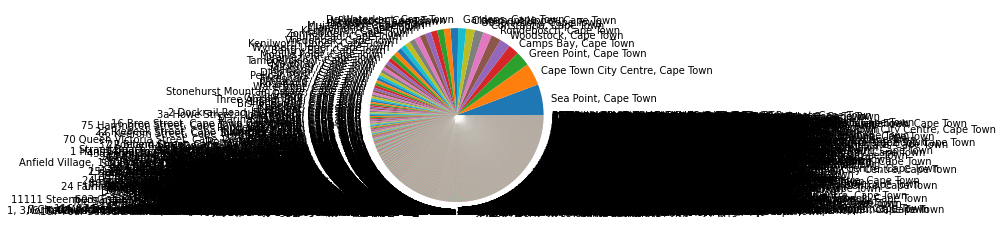

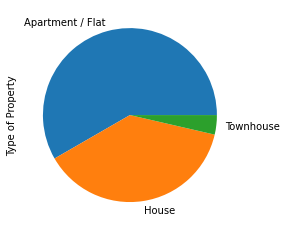

In [57]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

## Relation variable / target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


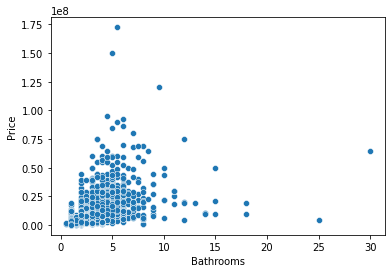

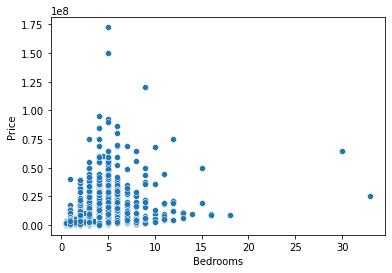

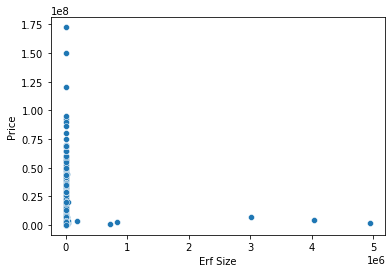

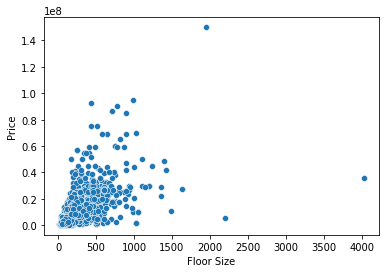

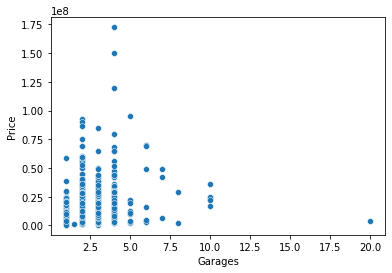

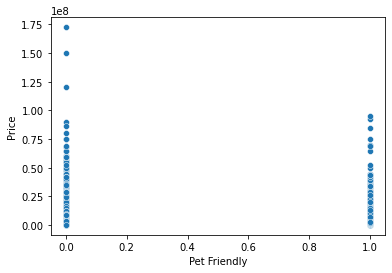

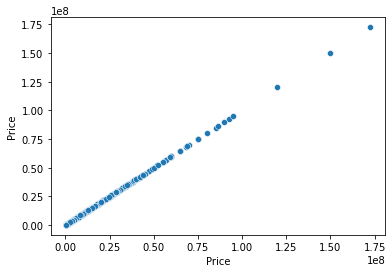

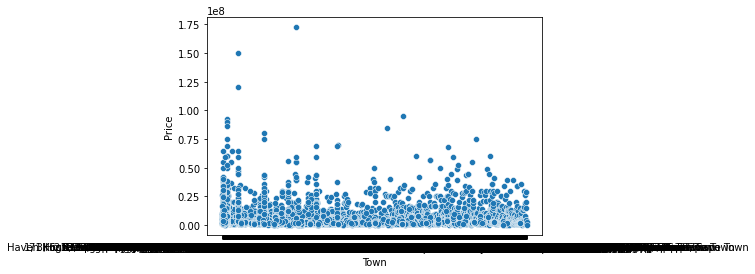

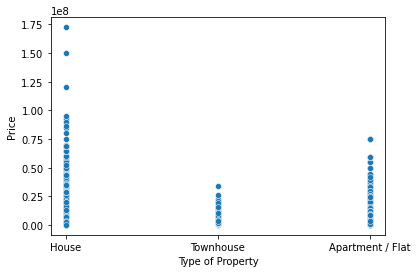

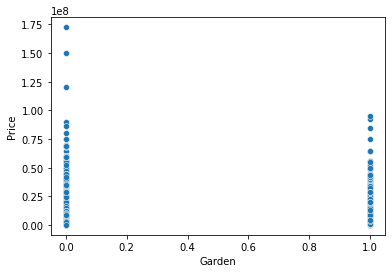

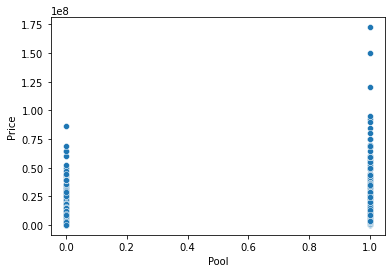

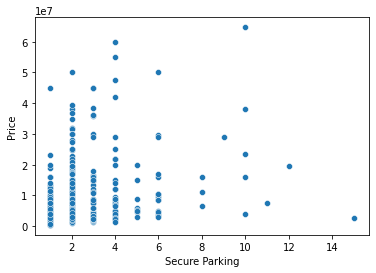

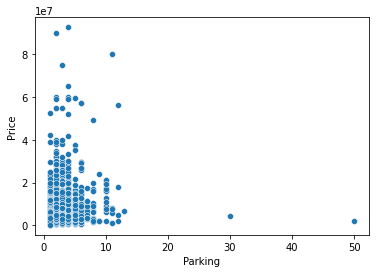

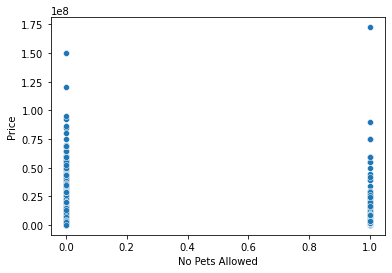

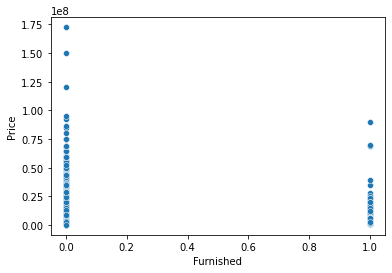

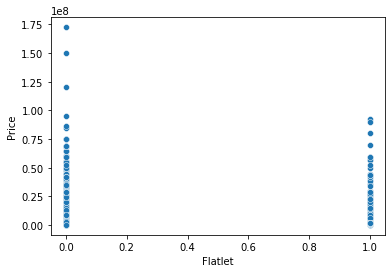

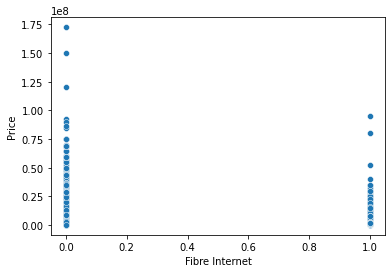

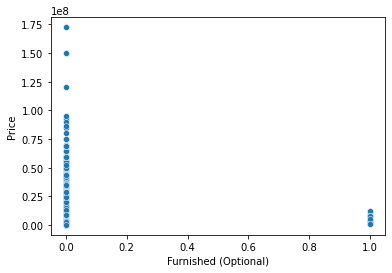

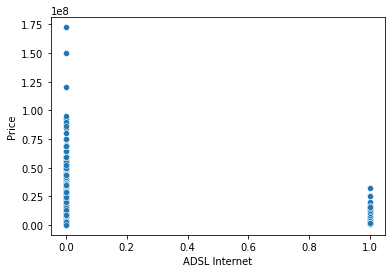

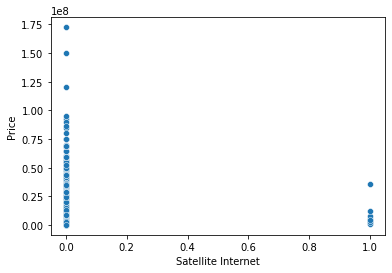

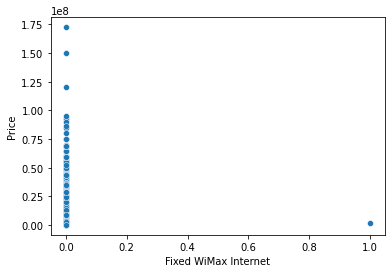

In [92]:
for col in data:
    plt.figure()
    sns.scatterplot(y="Price", x=col, data=data)